## Imports

In [79]:
from astropy import units as u
from astropy.coordinates import SkyCoord

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_scatter_density 
from matplotlib.colors import LinearSegmentedColormap

In [80]:
# IGNORE WARNINGS
import warnings
warnings.filterwarnings("ignore")

In [81]:
# 4 Points on the Galectic Plane 

x = [0 , 90, 180, 270]
y = 0

In [82]:
c = SkyCoord(l = x, b = y, unit='deg',  frame='galactic')

In [83]:
c.icrs

<SkyCoord (ICRS): (ra, dec) in deg
    [(266.40498829, -28.93617776), (318.00438151,  48.32963721),
     ( 86.40498829,  28.93617776), (138.00438151, -48.32963721)]>

In [84]:
# 2 Points on Up and Below of Galectic Plane

c = SkyCoord(l = 0, b = [90, -90], unit='deg', frame='galactic')

In [85]:
c.icrs

<SkyCoord (ICRS): (ra, dec) in deg
    [(192.85947789,  27.12825241), ( 12.85947789, -27.12825241)]>

---

## Plotting Function

In [86]:
hot = LinearSegmentedColormap.from_list('hot', [
    (0, '#ffffff'),
    (1e-20, '#0B0000'),
    (0.15, '#720000'),
    (0.3, '#DB0000'),
    (0.45, '#FF4500'),
    (0.6, '#FFAE00'),
    (0.75, '#FFFF24'),
    (0.9, '#FFFFAC'),
    (1, "#ffffff")
], N=65535)

def using_mpl_scatter_density(fig, dp):
    
    ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
    density = ax.scatter_density(dp['bp_rp'], 
                                 dp['mg'], 
                                 cmap=hot)
    fig.colorbar(density, label='Number of points per pixel')
    ax.set_xlabel('$ G _{bp} - G _{rp} $')
    ax.set_ylabel('$ M_{G} $')
    ax.set_ylim(20,-10)

---

## Reading data files
  
query: 
```
SELECT source_id, r_est, r_lo, r_hi, gaia_source.ra,gaia_source.dec,gaia_source.parallax,gaia_source.parallax_error,gaia_source.astrometric_n_good_obs_al,gaia_source.astrometric_chi2_al,gaia_source.visibility_periods_used,gaia_source.phot_g_mean_flux_over_error,gaia_source.phot_g_mean_mag,gaia_source.phot_bp_mean_flux_over_error,gaia_source.phot_bp_mean_mag,gaia_source.phot_rp_mean_flux_over_error,gaia_source.phot_rp_mean_mag,gaia_source.phot_bp_rp_excess_factor,gaia_source.bp_rp,gaia_source.l,gaia_source.b
FROM external.gaiadr2_geometric_distance
JOIN gaiadr2.gaia_source USING (source_id)
WHERE CONTAINS(
	POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),
 	CIRCLE('ICRS', #l , #b ,1) 
)=1
```

In [87]:
df0_0 = pd.read_csv('./data/0_0 - 1 deg-result.csv')
df90_0 = pd.read_csv('./data/90_0 - 1 deg-result.csv')
df180_0 = pd.read_csv('./data/180_0 - 1 deg-result.csv')
df270_0 = pd.read_csv('./data/270_0 - 1 deg-result.csv')
df0_90 = pd.read_csv('./data/0_90 - 1 deg-result.csv')
df0_m90 = pd.read_csv('./data/0_-90 - 1 deg-result.csv')

---

## Working on data at 0:0 in Galactic Coo.

In [88]:
df0_0.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
source_id,287201.0,4.057877e+18,1.218216e+15,4.056817e+18,4.057234e+18,4.057397e+18,4.057601e+18,4.060699e+18
r_est,287201.0,3.404074e+03,1.623435e+03,1.301665e+01,1.932577e+03,3.655324e+03,4.698513e+03,1.858595e+04
r_lo,287201.0,1.787546e+03,8.046925e+02,0.000000e+00,1.211347e+03,1.753638e+03,2.265535e+03,1.411534e+04
r_hi,287201.0,6.580786e+03,3.009504e+03,1.325552e+01,3.864592e+03,7.709393e+03,8.994113e+03,2.436147e+04
ra,287201.0,2.665588e+02,6.323661e-01,2.652624e+02,2.660340e+02,2.666642e+02,2.671052e+02,2.675475e+02
dec,287201.0,-2.890813e+01,4.863533e-01,-2.993595e+01,-2.929762e+01,-2.890345e+01,-2.849189e+01,-2.793646e+01
parallax,287201.0,4.844414e-01,9.461790e-01,-3.061900e+01,1.666822e-01,4.722105e-01,8.036359e-01,7.684470e+01
parallax_error,287201.0,4.960419e-01,4.344289e-01,2.228644e-02,1.712861e-01,3.637433e-01,6.914827e-01,3.586241e+00
astrometric_n_good_obs_al,287201.0,1.199195e+02,2.316286e+01,4.100000e+01,1.050000e+02,1.220000e+02,1.370000e+02,1.890000e+02
astrometric_chi2_al,287201.0,2.022827e+02,8.922931e+02,1.953511e+01,1.164525e+02,1.422127e+02,1.742719e+02,1.648777e+05


In [89]:
df0_0.sample(4)

,source_id,r_est,r_lo,r_hi,ra,dec,parallax,parallax_error,astrometric_n_good_obs_al,astrometric_chi2_al,...,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,bp_rp,l,b
259471,4060569627619870848,2591.253432,1859.503374,4144.223743,266.080252,-28.318389,0.388119,0.116844,154,218.87523,...,869.46330,17.388447,59.641910,18.386139,151.541200,16.357483,1.393555,2.028656,0.378029,0.565690
19551,4057280168029870976,2852.074320,809.671334,7156.164641,266.937071,-29.139083,1.334067,0.673639,117,156.05328,...,134.29378,20.142754,7.225029,20.728258,13.270674,18.896257,1.770397,1.832001,0.068059,-0.502937
145755,4056893479227318272,2035.268712,1537.292753,2982.281089,266.546995,-29.495408,0.498125,0.124515,114,133.67267,...,840.06555,17.062916,69.393400,17.915276,100.993720,16.126638,1.343495,1.788637,359.587000,-0.396908
74792,4057081152104139392,4830.057549,2301.252520,9156.512262,266.010821,-29.441951,0.103683,0.518276,103,139.64505,...,157.71692,19.540760,7.300212,20.824020,27.254642,18.428270,1.411768,2.395750,359.388955,0.029171


In [90]:
df0_0 = df0_0[~(df0_0['parallax'].isnull()) & ~(df0_0['bp_rp'].isnull())]

In [91]:
# POSITIVE PARALLAX FOR LOG

df0_0 = df0_0[df0_0['parallax'] > 0]
df0_0['mg'] = df0_0['phot_g_mean_mag'] + (5 * np.log10(df0_0['parallax']) -10)

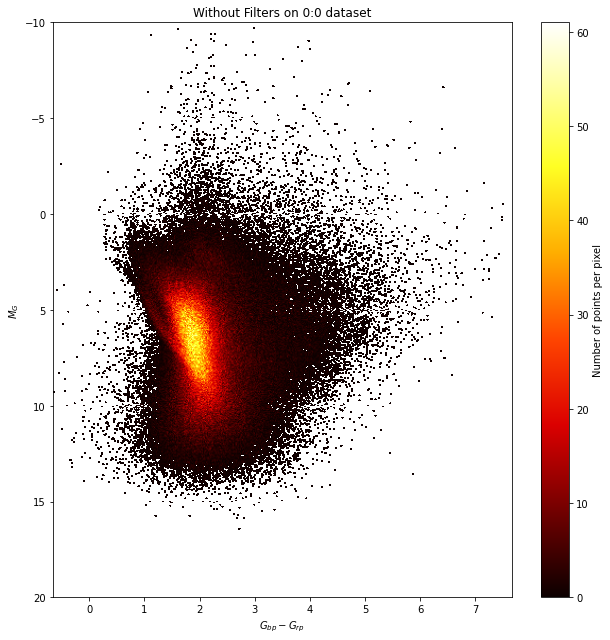

In [92]:
fig = plt.figure(figsize=(9,9))
using_mpl_scatter_density(fig, df0_0)


plt.title('Without Filters on 0:0 dataset')
plt.tight_layout()
plt.show()

In [93]:
df0_0 = df0_0[(df0_0['phot_g_mean_flux_over_error'] > 50) & (df0_0['phot_rp_mean_flux_over_error']>20) & (df0_0['phot_bp_mean_flux_over_error']>20)]

In [94]:
df0_0 = df0_0[df0_0['phot_bp_rp_excess_factor'] < (1.3 + 0.06 * ( df0_0['phot_bp_mean_mag'] - df0_0['phot_rp_mean_mag'])**2)]

In [95]:
df0_0 = df0_0[df0_0['phot_bp_rp_excess_factor'] > (1.0 + 0.015 * ( df0_0['phot_bp_mean_mag'] - df0_0['phot_rp_mean_mag'])**2)]

In [96]:
df0_0 = df0_0[df0_0['visibility_periods_used'] > 8]

In [97]:
df0_0['MAX'] = np.exp(-0.4 * (df0_0['phot_g_mean_mag']-19.5))

In [98]:
df0_0['MAX'] = df0_0['MAX'].apply(lambda x: 1 if(x<1) else x)

In [99]:
df0_0 = df0_0[(df0_0['astrometric_chi2_al'] / (df0_0['astrometric_n_good_obs_al']-5)) < 1.44 * df0_0["MAX"]]

In [100]:
df0_0.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
source_id,80608.0,4.057616e+18,9.623714e+14,4.056817e+18,4.057206e+18,4.057303e+18,4.057542e+18,4.060699e+18
r_est,80608.0,2.234377e+03,1.141729e+03,3.654322e+01,1.436748e+03,1.982732e+03,2.764943e+03,9.758141e+03
r_lo,80608.0,1.617522e+03,6.492419e+02,3.645945e+01,1.160820e+03,1.528058e+03,1.976217e+03,7.151443e+03
r_hi,80608.0,3.578283e+03,2.378438e+03,3.662737e+01,1.771700e+03,2.775373e+03,5.011532e+03,1.375444e+04
ra,80608.0,2.666154e+02,5.645442e-01,2.652652e+02,2.662051e+02,2.667035e+02,2.670752e+02,2.675469e+02
dec,80608.0,-2.897811e+01,4.798931e-01,-2.993595e+01,-2.935299e+01,-2.901493e+01,-2.859767e+01,-2.793646e+01
parallax,80608.0,6.025330e-01,4.952360e-01,1.930212e-04,3.756825e-01,5.170804e-01,7.070085e-01,2.733614e+01
parallax_error,80608.0,1.271443e-01,7.089305e-02,2.228644e-02,7.189844e-02,1.141728e-01,1.679521e-01,1.060181e+00
astrometric_n_good_obs_al,80608.0,1.359453e+02,1.763876e+01,7.500000e+01,1.230000e+02,1.370000e+02,1.490000e+02,1.890000e+02
astrometric_chi2_al,80608.0,1.627186e+02,1.161411e+02,2.624874e+01,1.221178e+02,1.454602e+02,1.724298e+02,5.415918e+03


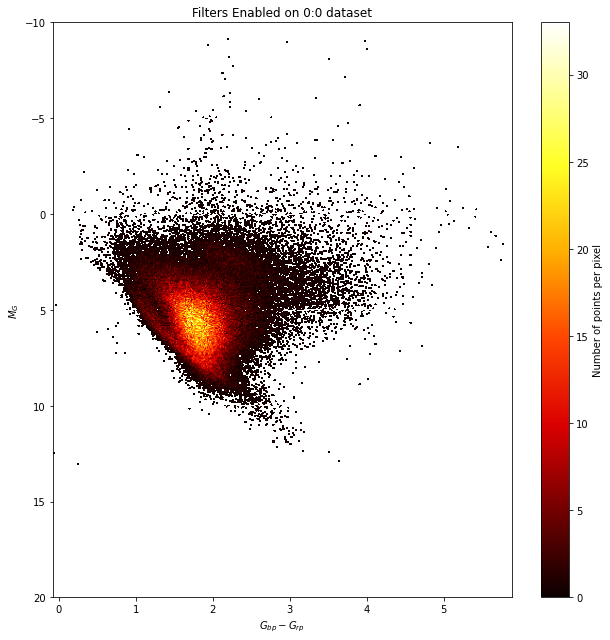

In [101]:
fig = plt.figure(figsize=(9,9))
using_mpl_scatter_density(fig, df0_0)

plt.title('Filters Enabled on 0:0 dataset')
plt.tight_layout()
plt.show()

### Extiction

In [102]:
###

---

## Working on data at 90:0 in Galactic Coo.

In [103]:
df90_0.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
source_id,343283.0,2.165264e+18,4.181611e+14,2.164437e+18,2.164921e+18,2.165318e+18,2.165593e+18,2.165985e+18
r_est,343283.0,2.406920e+03,9.760227e+02,3.349712e+01,1.798120e+03,2.355718e+03,2.924232e+03,1.134689e+04
r_lo,343283.0,1.557511e+03,7.654450e+02,0.000000e+00,1.034206e+03,1.431989e+03,1.941050e+03,8.997503e+03
r_hi,343283.0,3.931101e+03,1.383813e+03,3.366924e+01,3.138470e+03,4.106521e+03,4.758154e+03,1.431415e+04
ra,343283.0,3.179370e+02,7.437899e-01,3.165007e+02,3.173267e+02,3.179201e+02,3.185344e+02,3.195083e+02
dec,343283.0,4.833359e+01,4.950675e-01,4.732977e+01,4.793517e+01,4.833042e+01,4.873639e+01,4.932899e+01
parallax,343283.0,3.567686e-01,8.997077e-01,-1.570438e+01,4.106934e-02,3.332398e-01,6.492322e-01,2.982583e+01
parallax_error,343283.0,4.697738e-01,4.289647e-01,1.480602e-02,1.512114e-01,3.554528e-01,6.427171e-01,4.092133e+00
astrometric_n_good_obs_al,343283.0,2.004397e+02,3.957221e+01,4.600000e+01,1.840000e+02,2.090000e+02,2.270000e+02,3.020000e+02
astrometric_chi2_al,343283.0,3.698297e+02,4.160350e+03,3.045650e+01,1.952536e+02,2.302654e+02,2.658935e+02,1.009205e+06


In [104]:
df90_0.sample(4)

,source_id,r_est,r_lo,r_hi,ra,dec,parallax,parallax_error,astrometric_n_good_obs_al,astrometric_chi2_al,...,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,bp_rp,l,b
339322,2165590478508331008,670.894709,309.546668,3041.224208,316.988188,48.997911,2.737184,1.163338,103,131.326810,...,84.858420,20.749699,5.809901,21.284270,7.638610,19.311193,2.050701,1.973076,90.032292,0.946565
323556,2165571271414960640,1846.003090,696.533517,3881.674069,317.045178,48.868948,1.775049,1.394414,87,62.129066,...,78.874480,20.794664,4.084851,21.189661,8.068070,19.588356,1.803608,1.601305,89.962618,0.831761
124202,2165335009554546944,3313.535157,2264.602758,5105.847540,316.881017,48.064452,0.174337,0.170090,253,302.421970,...,520.220030,18.520530,29.852705,19.375055,105.800830,17.542917,1.381989,1.832138,89.296115,0.368204
79254,2164515877702358656,2110.254035,998.887465,4054.966287,318.207878,47.708816,0.481059,1.024379,121,119.963080,...,101.732285,20.752792,5.655347,21.365881,12.110459,19.465338,1.811295,1.900543,89.642235,-0.525317


In [105]:
df90_0 = df90_0[~(df90_0['parallax'].isnull()) & ~(df90_0['bp_rp'].isnull())]

In [106]:
# POSITIVE PARALLAX FOR LOG

df90_0 = df90_0[df90_0['parallax'] > 0]
df90_0['mg'] = df90_0['phot_g_mean_mag'] + (5 * np.log10(df90_0['parallax']) -10)

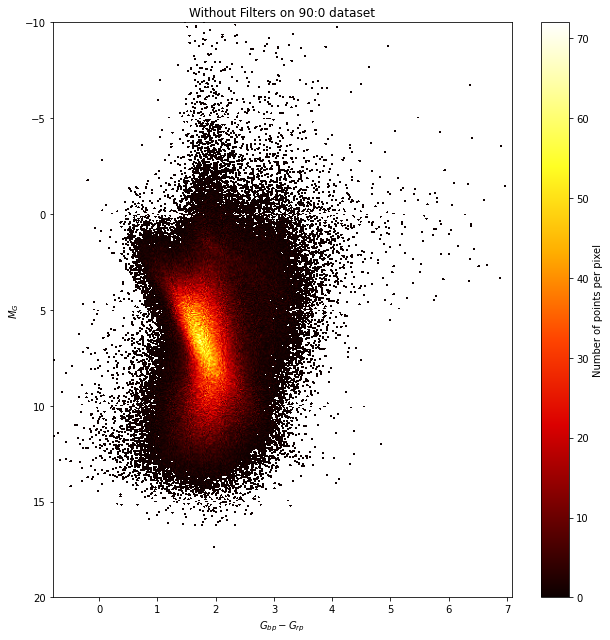

In [107]:
fig = plt.figure(figsize=(9,9))
using_mpl_scatter_density(fig, df90_0)

plt.title('Without Filters on 90:0 dataset')
plt.tight_layout()
plt.show()

In [108]:
# Filters 

df90_0 = df90_0[(df90_0['phot_g_mean_flux_over_error'] > 50) & (df90_0['phot_rp_mean_flux_over_error']>20) & (df90_0['phot_bp_mean_flux_over_error']>20)]
df90_0 = df90_0[df90_0['phot_bp_rp_excess_factor'] < (1.3 + 0.06 * ( df90_0['phot_bp_mean_mag'] - df90_0['phot_rp_mean_mag'])**2)]
df90_0 = df90_0[df90_0['visibility_periods_used'] > 8]
df90_0['MAX'] = np.exp(-0.4 * (df90_0['phot_g_mean_mag']-19.5))
df90_0['MAX'] = df90_0['MAX'].apply(lambda x: 1 if(x<1) else x)
df90_0 = df90_0[(df90_0['astrometric_chi2_al'] / (df90_0['astrometric_n_good_obs_al']-5)) < 1.44 * df90_0["MAX"]]

In [109]:
df90_0.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
source_id,98533.0,2.165245e+18,4.149178e+14,2.164452e+18,2.164915e+18,2.165307e+18,2.165583e+18,2.165985e+18
r_est,98533.0,2.503820e+03,1.072721e+03,4.848410e+01,1.737620e+03,2.397780e+03,3.165361e+03,9.819757e+03
r_lo,98533.0,1.981700e+03,7.929386e+02,4.826717e+01,1.435829e+03,1.893100e+03,2.435197e+03,8.128163e+03
r_hi,98533.0,3.346512e+03,1.592869e+03,4.870296e+01,2.109774e+03,3.197552e+03,4.481123e+03,1.203365e+04
ra,98533.0,3.179663e+02,7.582585e-01,3.165007e+02,3.173283e+02,3.179555e+02,3.185876e+02,3.195064e+02
dec,98533.0,4.831681e+01,4.862677e-01,4.732990e+01,4.792583e+01,4.830431e+01,4.871071e+01,4.932854e+01
parallax,98533.0,4.694239e-01,4.794840e-01,7.875077e-06,2.470087e-01,3.809811e-01,5.557637e-01,2.059712e+01
parallax_error,98533.0,1.031078e-01,5.877120e-02,1.480602e-02,5.616141e-02,9.349194e-02,1.419470e-01,6.088238e-01
astrometric_n_good_obs_al,98533.0,2.235675e+02,2.200236e+01,8.600000e+01,2.090000e+02,2.240000e+02,2.380000e+02,3.020000e+02
astrometric_chi2_al,98533.0,2.572453e+02,1.690237e+02,6.362727e+01,2.073612e+02,2.367299e+02,2.700364e+02,1.915809e+04


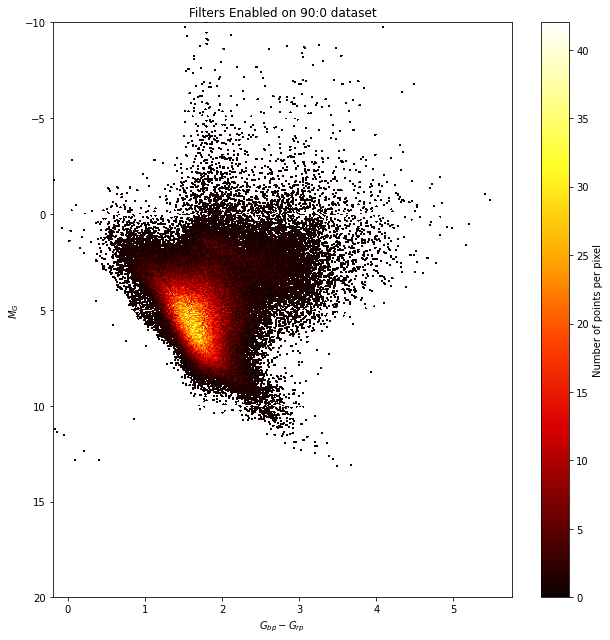

In [110]:
fig = plt.figure(figsize=(9,9))
using_mpl_scatter_density(fig, df90_0)

plt.title('Filters Enabled on 90:0 dataset')
plt.tight_layout()
plt.show()

### Extiction

In [111]:
#### 

---

## Working on data at 180:0 in Galactic Coo.

In [112]:
df180_0.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
source_id,89879.0,3.443496e+18,6.418643e+14,3.441594e+18,3.443303e+18,3.443441e+18,3.444161e+18,3.444357e+18
r_est,89879.0,2.492352e+03,1.065582e+03,5.031260e+01,1.770027e+03,2.521869e+03,3.115654e+03,9.169224e+03
r_lo,89879.0,1.566443e+03,7.610065e+02,0.000000e+00,1.055161e+03,1.449422e+03,1.956636e+03,7.088131e+03
r_hi,89879.0,4.189275e+03,1.677405e+03,5.044423e+01,3.126916e+03,4.580861e+03,5.299222e+03,1.197011e+04
ra,89879.0,8.648596e+01,5.661511e-01,8.526346e+01,8.604871e+01,8.651001e+01,8.694294e+01,8.754641e+01
dec,89879.0,2.896360e+01,5.099677e-01,2.793669e+01,2.855252e+01,2.897486e+01,2.937884e+01,2.993585e+01
parallax,89879.0,4.349132e-01,8.702591e-01,-2.280628e+01,9.065631e-02,3.701893e-01,7.247723e-01,1.984700e+01
parallax_error,89879.0,4.447504e-01,4.047789e-01,2.145348e-02,1.407731e-01,3.079519e-01,6.402902e-01,3.762816e+00
astrometric_n_good_obs_al,89879.0,1.246949e+02,2.287961e+01,4.500000e+01,1.100000e+02,1.240000e+02,1.410000e+02,1.960000e+02
astrometric_chi2_al,89879.0,2.139212e+02,2.947843e+03,2.405947e+01,1.119769e+02,1.350036e+02,1.608343e+02,4.168018e+05


In [113]:
df180_0.sample(3)

,source_id,r_est,r_lo,r_hi,ra,dec,parallax,parallax_error,astrometric_n_good_obs_al,astrometric_chi2_al,...,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,bp_rp,l,b
74801,3444289134003505920,2519.150024,1548.573445,4519.346752,86.462187,29.670682,0.370217,0.259810,155,219.02876,...,362.37186,18.576002,15.986707,19.518856,39.47994,17.524593,1.429638,1.994263,179.398940,0.425115
54030,3443549643717145344,2387.512702,1437.821149,4396.291934,87.128043,29.616707,0.411818,0.285594,118,138.46588,...,471.70908,17.757154,27.036580,18.513205,138.12766,16.861347,1.337593,1.651857,179.744984,0.892110
25315,3443369392526698368,4512.330309,2911.098827,6960.135730,86.334250,28.678694,-0.402087,0.290428,140,188.64082,...,305.14290,18.576197,52.777290,19.622139,134.63070,17.558279,1.367689,2.063860,180.187416,-0.187121


In [114]:
df180_0 = df180_0[~(df180_0['parallax'].isnull()) & ~(df180_0['bp_rp'].isnull())]

In [115]:
# POSITIVE PARALLAX FOR LOG

df180_0 = df180_0[df180_0['parallax'] > 0]
df180_0['mg'] = df180_0['phot_g_mean_mag'] + (5 * np.log10(df180_0['parallax']) -10)

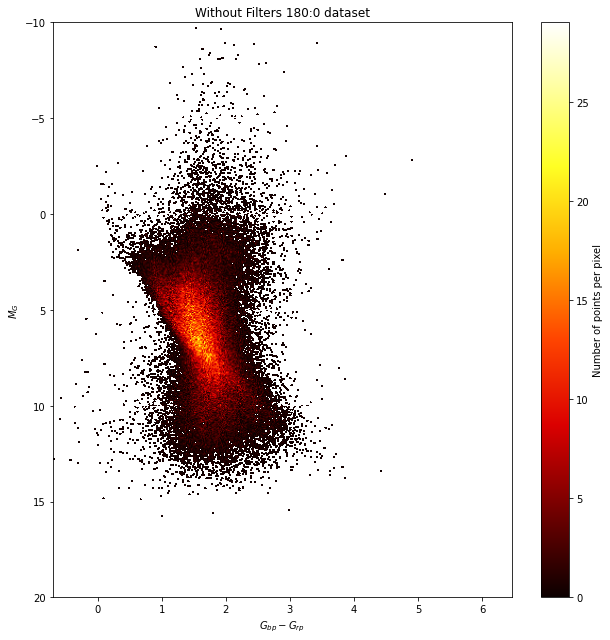

In [116]:
fig = plt.figure(figsize=(9,9))
using_mpl_scatter_density(fig, df180_0)

plt.title('Without Filters 180:0 dataset')
plt.tight_layout()
plt.show()

In [117]:
df180_0

,source_id,r_est,r_lo,r_hi,ra,dec,parallax,parallax_error,astrometric_n_good_obs_al,astrometric_chi2_al,...,phot_g_mean_mag,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,bp_rp,l,b,mg
0,3442642374824741632,3800.407797,2467.560402,6011.299004,85.386450,28.684120,0.055285,0.213450,130,160.15622,...,18.260513,12.461336,19.065256,62.923065,17.236643,1.443272,1.828613,179.746285,-0.891999,1.973541
2,3442648937532944128,1208.871526,979.008940,1573.362216,85.476967,28.923881,0.833141,0.166796,131,150.32535,...,18.019447,31.344883,18.946260,83.373314,17.028456,1.373487,1.917805,179.584544,-0.698036,7.623039
3,3442628527849984768,2776.146776,1469.372240,5075.229016,85.532756,28.604423,0.146024,0.561118,141,156.91026,...,19.723540,8.041675,20.511536,27.869858,18.585054,1.570493,1.926481,179.881764,-0.825006,5.545666
4,3442631933758033792,854.210016,398.695180,3356.414980,85.605064,28.718577,2.085351,0.914580,103,72.42103,...,20.455510,3.867672,20.932180,12.599062,19.195745,1.831988,1.736435,179.818184,-0.710923,12.051405
5,3442624890011192320,1721.616595,777.392860,3957.404250,85.561500,28.525532,1.061536,0.686588,134,129.18153,...,19.911148,3.933793,20.556683,22.296309,18.551256,1.895230,2.005426,179.962119,-0.845144,10.040822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89870,3441804203368047360,3217.716386,1870.514090,5517.536232,86.187456,28.214724,0.018113,0.386121,129,186.57907,...,18.812012,13.015621,19.615715,24.123379,17.883830,1.351326,1.731886,180.515772,-0.539418,0.101970
89871,3441805577757601664,1392.703957,1251.038489,1569.542041,86.122038,28.264137,0.696633,0.078065,157,206.49350,...,16.144423,154.132490,16.667555,354.800800,15.456689,1.255482,1.210866,180.443517,-0.562716,5.359443
89874,3441843270390206976,2149.488447,1696.930337,2892.001264,85.891233,28.100738,0.443719,0.109794,111,127.73368,...,16.527887,89.204130,17.206144,193.855410,15.679859,1.322881,1.526285,180.476139,-0.821605,4.763429
89877,3441856705045988480,2779.418522,1439.636294,5077.360564,85.943861,28.357078,0.064346,0.681838,113,123.17502,...,19.811462,8.449099,20.542053,22.557487,18.726364,1.531427,1.815689,180.282185,-0.647685,3.854069


In [118]:
# Filters 

df180_0 = df180_0[(df180_0['phot_g_mean_flux_over_error'] > 50) & (df180_0['phot_rp_mean_flux_over_error']>20) & (df180_0['phot_bp_mean_flux_over_error']>20)]
df180_0 = df180_0[df180_0['phot_bp_rp_excess_factor'] < (1.3 + 0.06 * ( df180_0['phot_bp_mean_mag'] - df180_0['phot_rp_mean_mag'])**2)]
df180_0 = df180_0[df180_0['visibility_periods_used'] > 8]
df180_0['MAX'] = np.exp(-0.4 * (df180_0['phot_g_mean_mag']-19.5))
df180_0['MAX'] = df180_0['MAX'].apply(lambda x: 1 if(x<1) else x)
df180_0 = df180_0[(df180_0['astrometric_chi2_al'] / (df180_0['astrometric_n_good_obs_al']-5)) < 1.44 * df180_0["MAX"]]

In [119]:
df180_0.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
source_id,35435.0,3.443493e+18,6.423792e+14,3.441594e+18,3.443302e+18,3.443438e+18,3.444162e+18,3.444357e+18
r_est,35435.0,2.379239e+03,1.148628e+03,5.031260e+01,1.491718e+03,2.286036e+03,3.146722e+03,8.108488e+03
r_lo,35435.0,1.781306e+03,8.065333e+02,5.018164e+01,1.204976e+03,1.680420e+03,2.245309e+03,6.363835e+03
r_hi,35435.0,3.433373e+03,1.822668e+03,5.044423e+01,1.851123e+03,3.375914e+03,4.881387e+03,1.053962e+04
ra,35435.0,8.649042e+01,5.559296e-01,8.526509e+01,8.606375e+01,8.651599e+01,8.693299e+01,8.754577e+01
dec,35435.0,2.895917e+01,5.115446e-01,2.793917e+01,2.853679e+01,2.897291e+01,2.937607e+01,2.993579e+01
parallax,35435.0,5.567423e-01,6.200212e-01,1.414183e-05,2.526801e-01,4.194655e-01,6.706969e-01,1.984700e+01
parallax_error,35435.0,1.358033e-01,8.518429e-02,2.145348e-02,6.844873e-02,1.181967e-01,1.849113e-01,8.950308e-01
astrometric_n_good_obs_al,35435.0,1.389053e+02,1.757585e+01,7.600000e+01,1.270000e+02,1.400000e+02,1.500000e+02,1.960000e+02
astrometric_chi2_al,35435.0,1.558715e+02,8.705710e+01,4.024122e+01,1.225417e+02,1.454892e+02,1.708206e+02,4.504499e+03


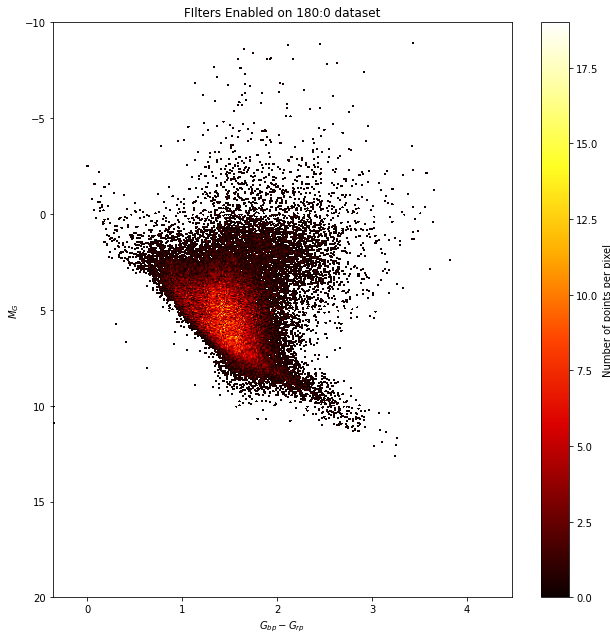

In [120]:
fig = plt.figure(figsize=(9,9))
using_mpl_scatter_density(fig, df180_0)

plt.title('FIlters Enabled on 180:0 dataset')
plt.tight_layout()
plt.show()

---

## Working on 270:0 dataset

In [121]:
df270_0.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
source_id,73387.0,5.326488e+18,4.329251e+14,5.325779e+18,5.326016e+18,5.326459e+18,5.326844e+18,5.327301e+18
r_est,73387.0,1.998079e+03,9.452039e+02,4.307228e+01,1.318423e+03,2.000321e+03,2.557202e+03,8.913147e+03
r_lo,73387.0,1.246835e+03,6.436569e+02,0.000000e+00,8.051652e+02,1.153585e+03,1.553126e+03,6.920842e+03
r_hi,73387.0,3.389937e+03,1.514347e+03,4.318780e+01,2.263676e+03,3.713150e+03,4.425333e+03,1.154164e+04
ra,73387.0,1.379331e+02,7.222577e-01,1.365002e+02,1.373445e+02,1.379422e+02,1.384854e+02,1.395079e+02
dec,73387.0,-4.845333e+01,5.197324e-01,-4.932961e+01,-4.889527e+01,-4.852155e+01,-4.802226e+01,-4.733067e+01
parallax,73387.0,5.885153e-01,1.059860e+00,-1.294748e+01,1.074095e-01,5.169475e-01,9.888664e-01,2.318811e+01
parallax_error,73387.0,5.229389e-01,4.552508e-01,1.511750e-02,1.758856e-01,4.109788e-01,7.210999e-01,4.600765e+00
astrometric_n_good_obs_al,73387.0,1.983761e+02,4.072998e+01,4.900000e+01,1.820000e+02,2.080000e+02,2.260000e+02,3.130000e+02
astrometric_chi2_al,73387.0,4.187532e+02,4.263922e+03,2.899982e+01,2.099078e+02,2.499082e+02,2.920041e+02,5.342136e+05


In [122]:
df270_0.sample(3)

,source_id,r_est,r_lo,r_hi,ra,dec,parallax,parallax_error,astrometric_n_good_obs_al,astrometric_chi2_al,...,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,bp_rp,l,b
51793,5325978937050039936,1101.815760,691.195522,2313.206832,138.802243,-48.893025,1.042705,0.391745,228,267.43933,...,291.6755,19.473478,8.849901,20.691248,61.102410,18.238865,1.567047,2.452383,270.771761,-0.006526
45972,5326061026763499648,1295.658879,1218.434830,1383.102156,138.226060,-48.489585,0.745044,0.047759,215,741.01330,...,2943.4453,14.286573,227.367980,15.913191,655.955200,13.034005,1.514252,2.879186,270.217314,-0.002926
16208,5326813397656149376,2774.535859,1628.607620,4695.594291,137.772542,-48.363001,-0.068847,0.465909,193,213.57623,...,257.8609,19.627453,5.429611,21.017490,37.390385,18.381767,1.545620,2.635723,269.918798,-0.135140


In [123]:
df270_0 = df270_0[~(df270_0['parallax'].isnull()) & ~(df270_0['bp_rp'].isnull())]

In [124]:
# POSITIVE PARALLAX FOR LOG

df270_0 = df270_0[df270_0['parallax'] > 0]
df270_0['mg'] = df270_0['phot_g_mean_mag'] + (5 * np.log10(df270_0['parallax']) -10)

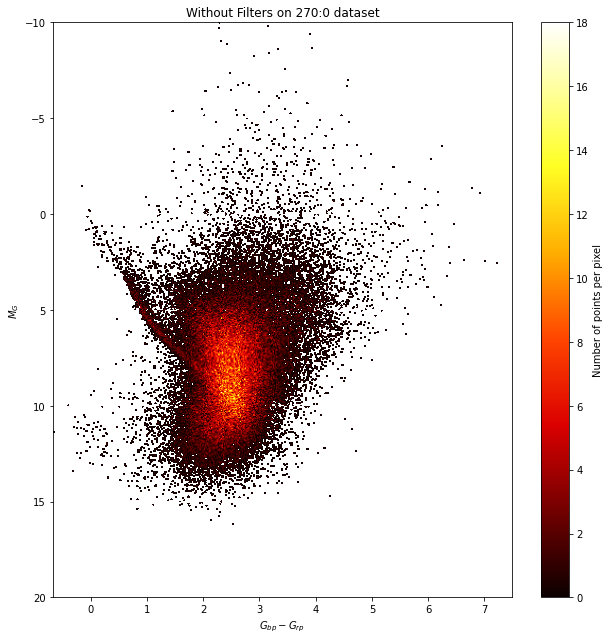

In [125]:
fig = plt.figure(figsize=(9,9))
using_mpl_scatter_density(fig, df270_0)

plt.title('Without Filters on 270:0 dataset')
plt.tight_layout()
plt.show()

In [126]:
# Filters 

df270_0 = df270_0[(df270_0['phot_g_mean_flux_over_error'] > 50) & (df270_0['phot_rp_mean_flux_over_error']>20) & (df270_0['phot_bp_mean_flux_over_error']>20)]
df270_0 = df270_0[df270_0['phot_bp_rp_excess_factor'] < (1.3 + 0.06 * ( df270_0['phot_bp_mean_mag'] - df270_0['phot_rp_mean_mag'])**2)]
df270_0 = df270_0[df270_0['visibility_periods_used'] > 8]
df270_0['MAX'] = np.exp(-0.4 * (df270_0['phot_g_mean_mag']-19.5))
df270_0['MAX'] = df270_0['MAX'].apply(lambda x: 1 if(x<1) else x)
df270_0 = df270_0[(df270_0['astrometric_chi2_al'] / (df270_0['astrometric_n_good_obs_al']-5)) < 1.44 * df270_0["MAX"]]

In [127]:
df270_0.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
source_id,15370.0,5.326495e+18,4.407716e+14,5.325785e+18,5.326014e+18,5.326459e+18,5.326855e+18,5.327288e+18
r_est,15370.0,1.565740e+03,9.740648e+02,4.307228e+01,8.521137e+02,1.379296e+03,1.979470e+03,6.922442e+03
r_lo,15370.0,1.307828e+03,7.037107e+02,4.295736e+01,7.967720e+02,1.209782e+03,1.636717e+03,5.467647e+03
r_hi,15370.0,1.966524e+03,1.439541e+03,4.318780e+01,9.128145e+02,1.576127e+03,2.527675e+03,8.965141e+03
ra,15370.0,1.379652e+02,7.315456e-01,1.365031e+02,1.373786e+02,1.380003e+02,1.385187e+02,1.395035e+02
dec,15370.0,-4.843136e+01,5.397693e-01,-4.932906e+01,-4.890704e+01,-4.847175e+01,-4.796415e+01,-4.733437e+01
parallax,15370.0,9.635668e-01,9.882591e-01,3.202246e-04,4.801162e-01,7.057818e-01,1.152970e+00,2.318811e+01
parallax_error,15370.0,8.869050e-02,4.771466e-02,1.511750e-02,4.948734e-02,8.353009e-02,1.207852e-01,3.945437e-01
astrometric_n_good_obs_al,15370.0,2.250975e+02,2.081479e+01,1.010000e+02,2.110000e+02,2.260000e+02,2.380000e+02,3.110000e+02
astrometric_chi2_al,15370.0,3.182033e+02,2.709940e+02,7.238887e+01,2.280595e+02,2.639181e+02,3.116781e+02,6.566173e+03


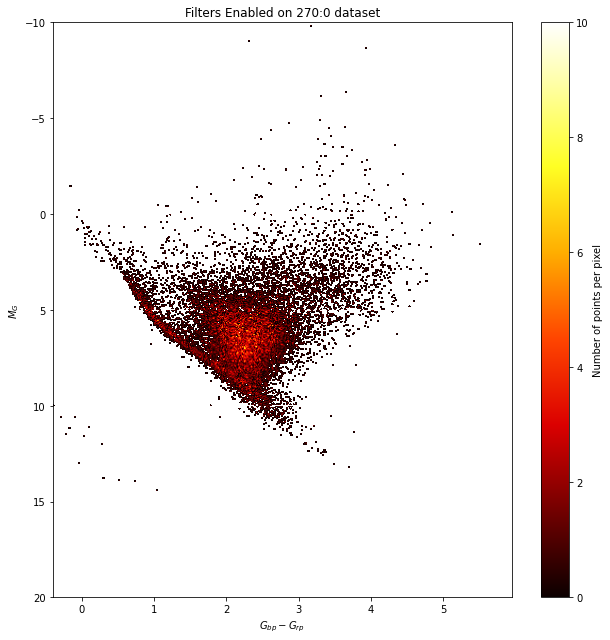

In [128]:
fig = plt.figure(figsize=(9,9))
using_mpl_scatter_density(fig, df270_0)

plt.title("Filters Enabled on 270:0 dataset")
plt.tight_layout()
plt.show()

--- 
## Working on 0:90 dataset

In [129]:
df0_90.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
source_id,6914.0,3.907181e+18,3.638968e+17,1.463676e+18,3.961543e+18,3.961679e+18,3.961816e+18,3.962011e+18
r_est,6914.0,1.169634e+03,6.842050e+02,4.136855e+01,6.970817e+02,1.077480e+03,1.491403e+03,8.338939e+03
r_lo,6914.0,8.527250e+02,5.583401e+02,4.078443e+01,4.757417e+02,7.192342e+02,1.085199e+03,7.312581e+03
r_hi,6914.0,1.705140e+03,9.039144e+02,4.196933e+01,1.024619e+03,1.735056e+03,2.225267e+03,9.573662e+03
ra,6914.0,1.928648e+02,5.687426e-01,1.917398e+02,1.924080e+02,1.928723e+02,1.933226e+02,1.939817e+02
dec,6914.0,2.712598e+01,5.024906e-01,2.613488e+01,2.671441e+01,2.712554e+01,2.753623e+01,2.812698e+01
parallax,6914.0,1.026644e+00,1.608638e+00,-8.554429e+00,2.313367e-01,7.612508e-01,1.575454e+00,2.415328e+01
parallax_error,6914.0,5.741600e-01,5.864172e-01,2.305877e-02,1.490893e-01,3.951583e-01,8.020862e-01,5.140899e+00
astrometric_n_good_obs_al,6914.0,2.437969e+02,4.948525e+01,6.000000e+01,2.240000e+02,2.525000e+02,2.760000e+02,3.690000e+02
astrometric_chi2_al,6914.0,5.487351e+02,1.351398e+04,3.996334e+01,2.213235e+02,2.633008e+02,3.036523e+02,1.113041e+06


In [130]:
df0_90 = df0_90[~(df0_90['parallax'].isnull()) & ~(df0_90['bp_rp'].isnull())]

In [131]:
# POSITIVE PARALLAX FOR LOG

df0_90 = df0_90[df0_90['parallax'] > 0]
df0_90['mg'] = df0_90['phot_g_mean_mag'] + (5 * np.log10(df0_90['parallax']) -10)

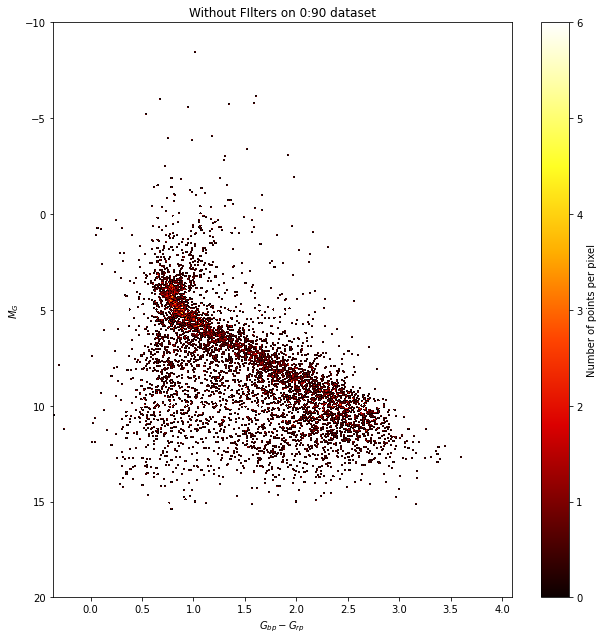

In [132]:
fig = plt.figure(figsize=(9,9))
using_mpl_scatter_density(fig, df0_90)

plt.title('Without FIlters on 0:90 dataset')
plt.tight_layout()
plt.show()

In [133]:
# Filters 

df0_90 = df0_90[(df0_90['phot_g_mean_flux_over_error'] > 50) & (df0_90['phot_rp_mean_flux_over_error']>20) & (df0_90['phot_bp_mean_flux_over_error']>20)]
df0_90 = df0_90[df0_90['phot_bp_rp_excess_factor'] < (1.3 + 0.06 * ( df0_90['phot_bp_mean_mag'] - df0_90['phot_rp_mean_mag'])**2)]
df0_90 = df0_90[df0_90['visibility_periods_used'] > 8]
df0_90['MAX'] = np.exp(-0.4 * (df0_90['phot_g_mean_mag']-19.5))
df0_90['MAX'] = df0_90['MAX'].apply(lambda x: 1 if(x<1) else x)
df0_90 = df0_90[(df0_90['astrometric_chi2_al'] / (df0_90['astrometric_n_good_obs_al']-5)) < 1.44 * df0_90["MAX"]]

In [134]:
df0_90.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
source_id,2956.0,3.904746e+18,3.717963e+17,1.463676e+18,3.961539e+18,3.961674e+18,3.961813e+18,3.962011e+18
r_est,2956.0,1.271029e+03,7.936830e+02,5.679026e+01,6.704528e+02,1.186171e+03,1.708026e+03,8.338939e+03
r_lo,2956.0,1.046565e+03,6.352989e+02,5.663461e+01,6.019048e+02,9.565486e+02,1.355653e+03,7.312581e+03
r_hi,2956.0,1.606512e+03,1.048566e+03,5.694674e+01,7.286794e+02,1.483144e+03,2.328583e+03,9.573662e+03
ra,2956.0,1.928723e+02,5.650534e-01,1.917629e+02,1.924180e+02,1.928871e+02,1.933253e+02,1.939796e+02
dec,2956.0,2.711724e+01,5.056791e-01,2.613488e+01,2.669845e+01,2.711498e+01,2.753824e+01,2.812698e+01
parallax,2956.0,1.241144e+00,1.482232e+00,3.711880e-04,4.154486e-01,7.869562e-01,1.472840e+00,1.757990e+01
parallax_error,2956.0,1.632181e-01,1.231260e-01,2.305877e-02,6.468789e-02,1.292938e-01,2.295853e-01,9.186148e-01
astrometric_n_good_obs_al,2956.0,2.703955e+02,2.927988e+01,1.280000e+02,2.500000e+02,2.690000e+02,2.900000e+02,3.690000e+02
astrometric_chi2_al,2956.0,3.063605e+02,3.091118e+02,1.207285e+02,2.423200e+02,2.781935e+02,3.182751e+02,1.418497e+04


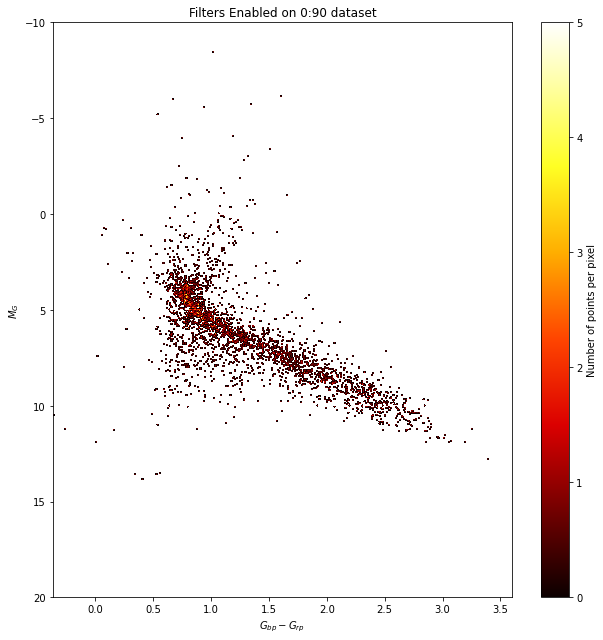

In [135]:
fig = plt.figure(figsize=(9,9))
using_mpl_scatter_density(fig, df0_90)

plt.title('Filters Enabled on 0:90 dataset')
plt.tight_layout()
plt.show()

### Extinction

In [136]:
###

--- 
## Working on 0:-90 Dataset

In [137]:
df0_m90.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
source_id,18772.0,2.366428e+18,2.503187e+17,2.342464e+18,2.342878e+18,2.342906e+18,2.342908e+18,5.032770e+18
r_est,18772.0,1.308720e+03,7.143851e+02,2.322720e+01,8.748404e+02,1.201487e+03,1.608506e+03,8.940375e+03
r_lo,18772.0,9.189479e+02,6.023431e+02,2.190293e+01,5.373681e+02,7.846999e+02,1.132375e+03,7.732898e+03
r_hi,18772.0,1.950234e+03,8.706986e+02,2.471897e+01,1.506683e+03,1.927782e+03,2.359247e+03,1.036645e+04
ra,18772.0,1.306245e+01,3.818205e-01,1.173969e+01,1.307814e+01,1.317463e+01,1.322024e+01,1.397763e+01
dec,18772.0,-2.679064e+01,4.070970e-01,-2.812788e+01,-2.686802e+01,-2.660420e+01,-2.656645e+01,-2.612869e+01
parallax,18772.0,5.209848e-01,1.693526e+00,-2.914665e+01,-1.339634e-01,3.687736e-01,1.083412e+00,4.331365e+01
parallax_error,18772.0,7.145368e-01,5.973415e-01,2.220794e-02,2.878496e-01,5.597286e-01,9.838922e-01,4.962337e+00
astrometric_n_good_obs_al,18772.0,2.264155e+02,5.669396e+01,5.000000e+01,1.930000e+02,2.400000e+02,2.680000e+02,3.730000e+02
astrometric_chi2_al,18772.0,3.956154e+02,3.763798e+03,3.142108e+01,1.995584e+02,2.484612e+02,2.956424e+02,3.813633e+05


In [138]:
df0_m90 = df0_m90[~(df0_m90['parallax'].isnull()) & ~(df0_m90['bp_rp'].isnull())]

In [139]:
# POSITIVE PARALLAX FOR LOG

df0_m90 = df0_m90[df0_m90['parallax'] > 0]
df0_m90['mg'] = df0_m90['phot_g_mean_mag'] + (5 * np.log10(df0_m90['parallax']) -10)

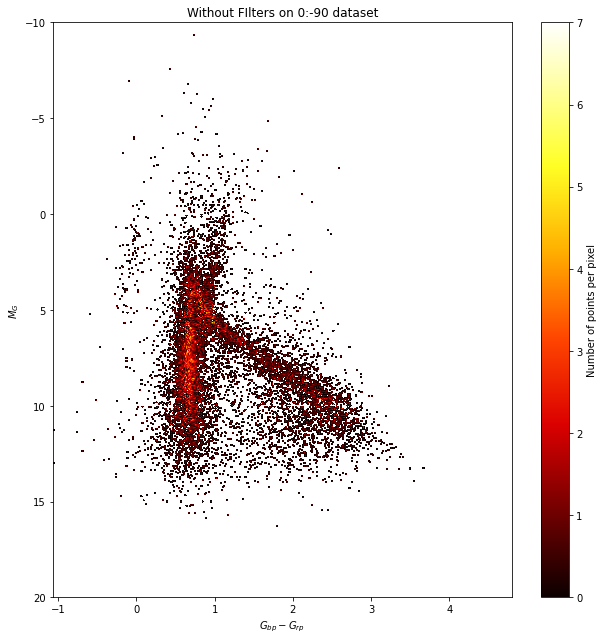

In [140]:
fig = plt.figure(figsize=(9,9))
using_mpl_scatter_density(fig, df0_m90)

plt.title('Without FIlters on 0:-90 dataset')
plt.tight_layout()
plt.show()

In [141]:
# Filters 

df0_m90 = df0_m90[(df0_m90['phot_g_mean_flux_over_error'] > 50) & (df0_m90['phot_rp_mean_flux_over_error']>20) & (df0_m90['phot_bp_mean_flux_over_error']>20)]
df0_m90 = df0_m90[df0_m90['phot_bp_rp_excess_factor'] < (1.3 + 0.06 * ( df0_m90['phot_bp_mean_mag'] - df0_m90['phot_rp_mean_mag'])**2)]
df0_m90 = df0_m90[df0_m90['visibility_periods_used'] > 8]
df0_m90['MAX'] = np.exp(-0.4 * (df0_m90['phot_g_mean_mag']-19.5))
df0_m90['MAX'] = df0_m90['MAX'].apply(lambda x: 1 if(x<1) else x)
df0_m90 = df0_m90[(df0_m90['astrometric_chi2_al'] / (df0_m90['astrometric_n_good_obs_al']-5)) < 1.44 * df0_m90["MAX"]]

In [142]:
df0_m90.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
source_id,4633.0,2.383000e+18,3.258371e+17,2.342464e+18,2.342685e+18,2.342903e+18,2.342909e+18,5.032770e+18
r_est,4633.0,1.488653e+03,9.930114e+02,4.899580e+01,7.855442e+02,1.343822e+03,1.870414e+03,7.502881e+03
r_lo,4633.0,1.203905e+03,8.318715e+02,4.876216e+01,6.808918e+02,1.016056e+03,1.458701e+03,6.570273e+03
r_hi,4633.0,1.912863e+03,1.233172e+03,4.923165e+01,8.913843e+02,1.900960e+03,2.524405e+03,8.628601e+03
ra,4633.0,1.296062e+01,4.936398e-01,1.173969e+01,1.260584e+01,1.312485e+01,1.324814e+01,1.397763e+01
dec,4633.0,-2.694655e+01,4.838055e-01,-2.812788e+01,-2.733421e+01,-2.674964e+01,-2.657007e+01,-2.614009e+01
parallax,4633.0,1.011675e+00,1.329795e+00,6.534670e-04,2.658028e-01,5.763306e-01,1.245878e+00,2.038178e+01
parallax_error,4633.0,1.945877e-01,1.486335e-01,2.220794e-02,7.067510e-02,1.555497e-01,2.832035e-01,1.094790e+00
astrometric_n_good_obs_al,4633.0,2.716838e+02,2.779045e+01,1.390000e+02,2.540000e+02,2.720000e+02,2.890000e+02,3.730000e+02
astrometric_chi2_al,4633.0,2.930670e+02,1.191941e+02,1.151944e+02,2.435393e+02,2.751798e+02,3.127545e+02,2.891669e+03


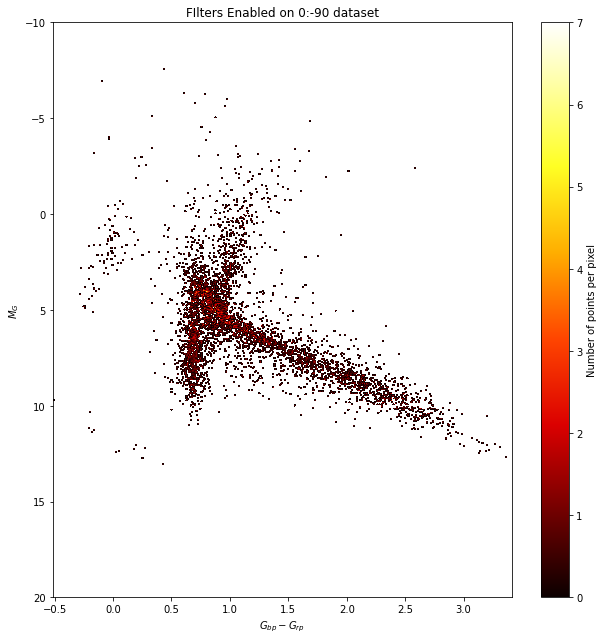

In [143]:
fig = plt.figure(figsize=(9,9))
using_mpl_scatter_density(fig, df0_m90)

plt.title('FIlters Enabled on 0:-90 dataset')
plt.tight_layout()
plt.show()